## Lab03 : Classification Decision Tree

Decision Tree is a supervised learning method used for classification and may be in regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.Decision tree builds classification models in the form of a tree structure It breaks down a data set into smaller and smaller subsets The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node.

In [1]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 320.0 kB/s eta 0:05:16
   ---------------------------------------- 0.0/101.1 MB 388.9 kB/s eta 0:04:20
   ---------------------------------------- 0.1/101.1 MB 558.5 kB/s eta 0:03:01
   ---------------------------------------- 0.1/101.1 MB 798.9 kB/s eta 0:02:07
   ---------------------------------------- 0.2/101.1 MB 817.0 kB/s eta 0:02:04
   ---------------------------------------- 0.3/101.1 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.3/101.1 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.3/101.1 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.4/101.1 MB 1.2 MB/s eta 0:01:26
   ---------------------------------------- 0.5/101.1 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.5/101.1 MB 1.4 MB/s et

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# of siblings / spouses aboard the Titanic
# of parents / children aboard the Titanic
# Ticket number
# Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


check for **Duplicates** values.

In [12]:
print("Number of Duplicated Data = ",titanic_train.duplicated().sum())

Number of Duplicated Data =  0


check for **Null** values.

In [10]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plot Features that have Nulls to decide which stratgy do we use

### Age

In [20]:
titanic_train.Age.nunique()

88

<Axes: xlabel='Age', ylabel='Count'>

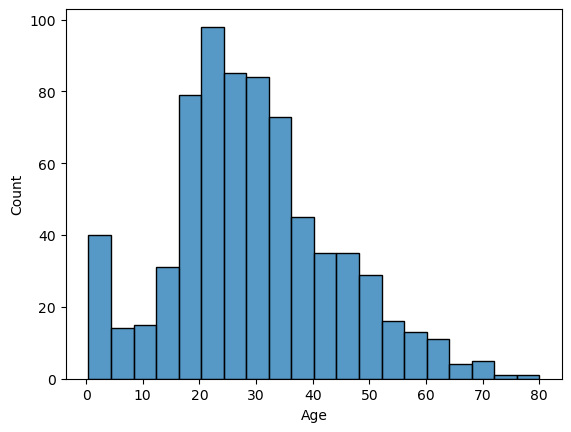

In [21]:
sns.histplot(titanic_train.Age)

Fill Null values

In [22]:
# Train
titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
print(titanic_train.Age.isna().sum())

0


### Cabin

In [24]:
len(titanic_train.Cabin.unique())
titanic_train.Cabin.nunique()

148

<Axes: xlabel='Cabin', ylabel='Count'>

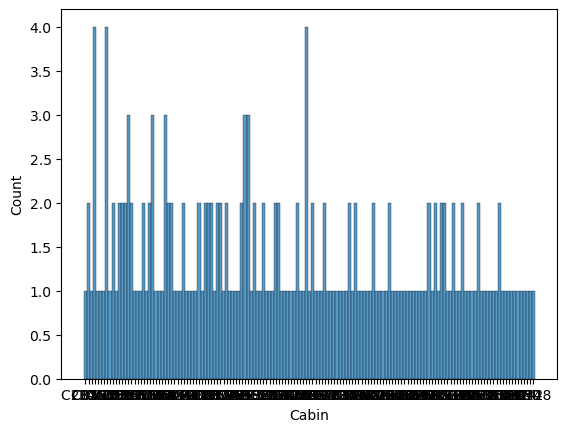

In [25]:
sns.histplot(titanic_train.Cabin)

Fill Null values

In [27]:
titanic_train.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [28]:
# Train
titanic_train.Cabin[titanic_train.Cabin.isna()] = titanic_train.Cabin.mode()[0]
print(titanic_train.Cabin.isna().sum())

0


### Embarked

In [13]:
titanic_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

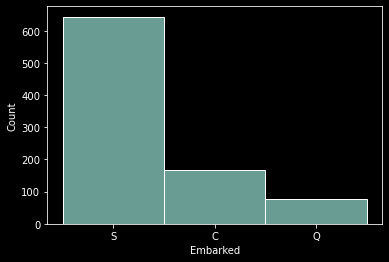

In [14]:
sns.histplot(titanic_train.Embarked)

Fill Null values

In [38]:

titanic_train.Embarked[titanic_train.Embarked.isna()] = titanic_train.Embarked.mode()[0]
print(titanic_train.Embarked.isna().sum())


0


### Split Data into X,Y

In [42]:
# Train
X = titanic_train.drop('Survived',axis=1)
Y = titanic_train['Survived']

### Split Train Data into Train and Validation sets

In [17]:
Xtrain,Xval, Ytrain,Yval= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [44]:
Xtrain.head()
Xval

NameError: name 'Xtrain' is not defined

### Remove Features that is useless

In [19]:
Xtrain = Xtrain.drop(['PassengerId','Name'],axis=1)
Xval = Xval.drop(['PassengerId','Name'],axis=1)

In [20]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,3,male,NaN,0,0,1601,56.4958,B96 B98,S
481,2,male,NaN,0,0,239854,0.0000,B96 B98,S
527,1,male,NaN,0,0,PC 17483,221.7792,C95,S
855,3,female,18.0,0,1,392091,9.3500,B96 B98,S
801,2,female,31.0,1,1,C.A. 31921,26.2500,B96 B98,S


### Apply One-Hot-Encoding to Categorical Features 

In [21]:
categoryStrFeatures = ['Sex','Ticket','Cabin','Embarked']

In [22]:
enc = OneHotEncoder(handle_unknown='ignore')
encoded_Xtrain= enc.fit_transform(Xtrain[categoryStrFeatures])
encoded_Xval = enc.transform(Xval[categoryStrFeatures])

In [24]:
encoded_Xtrain

<712x703 sparse matrix of type '<class 'numpy.float64'>'
	with 2848 stored elements in Compressed Sparse Row format>

### Decision Tree Classifier

In [26]:
DTC = DecisionTreeClassifier(criterion = "entropy",max_depth=5,random_state=42)
DTC.fit(encoded_Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [27]:
Ypredict = DTC.predict(encoded_Xval)
accuracy_score(Yval,Ypredict)

0.7821229050279329

In [30]:
DTC.score(encoded_Xtrain,Ytrain)

0.824438202247191